# Preparations

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from ucimlrepo import fetch_ucirepo
import statistics

In [2]:
# Set global theme for plotly
px.defaults.template = 'simple_white'

# Set the seaborn theme
sns.set_theme(style='white')

# Frequency Distribution

https://mciwing.github.io/statistics/univariate/Frequency/

Analyse the Dataset
- Look at the website of the dataset and get familiar

Generate the following plot (think about attribute types, title, labeling of the axes)
- Histogram | Absolute Frequency | Variable: origin
- Bar Chart | Absoulte Frequency | no binning | Variable: weight
- Histogram | Absoulte Frequency | automatic binning | Variable: weight
- Histogram | Relative Frequency | cumulated | Variable: hoursepower
- Pie Chart | Relative Frequency | Variable: cylinders


In [3]:
# fetch dataset 
cars = fetch_ucirepo(id=9) 
# https://archive.ics.uci.edu/dataset/9/auto+mpg

# create a dataframe
data = cars.data.features
data = data.join(cars.data.ids)
data.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,car_name
0,307.0,8,130.0,3504,12.0,70,1,"chevrolet,chevelle,malibu"
1,350.0,8,165.0,3693,11.5,70,1,"buick,skylark,320"
2,318.0,8,150.0,3436,11.0,70,1,"plymouth,satellite"
3,304.0,8,150.0,3433,12.0,70,1,"amc,rebel,sst"
4,302.0,8,140.0,3449,10.5,70,1,"ford,torino"


### Histogram | Absolute Frequency | Variable: origin

In [4]:
fig = px.histogram(
    data,
    x='origin',
    title='Car origin',
    width=500,
    )

fig.show()

### Bar Chart | Absoulte Frequency | no binning | Variable: weight

In [5]:
fig = px.bar(
    data,
    y='weight',
    width=500,
    title='Car weight',
    )

fig.show()

### Histogram | Absoulte Frequency | automatic binning | Variable: weight

In [6]:
fig = px.histogram(
    data,
    x='weight',
    title='Car weight',
    width=500,
    )

fig.show()

### Histogram | Relative Frequency | cumulated | Variable: hoursepower

In [7]:
fig = px.histogram(
    data,
    x='horsepower',
    title='Car horsepower',
    cumulative=True,
    histnorm='percent',
    width=500,
    )

fig.show()

### Pie Chart | Relative Frequency | Variable: cylinders

In [8]:
fig = px.pie(
    data,
    names='cylinders',
    title='Car cylinders',
    width=500,
    )

fig.show()

# Measures of Central Tendency

https://mciwing.github.io/statistics/univariate/Frequency/

Calculate all useful and meaningful measure of central tendency (mean, median, mode) for the following attributes (think about attribute types)
- car_name
- origin
- displacement

Calculate the quartiles and plot a Boxplot fo the attribute acceleration

In [9]:
data.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,car_name
0,307.0,8,130.0,3504,12.0,70,1,"chevrolet,chevelle,malibu"
1,350.0,8,165.0,3693,11.5,70,1,"buick,skylark,320"
2,318.0,8,150.0,3436,11.0,70,1,"plymouth,satellite"
3,304.0,8,150.0,3433,12.0,70,1,"amc,rebel,sst"
4,302.0,8,140.0,3449,10.5,70,1,"ford,torino"


### car_name

In [10]:
print(f'mode = {data['car_name'].mode().values[0]}')

mode = ford,pinto


mode = 'ford,pinto'

### origin

In [11]:
print(f'mode = {data['origin'].mode().values[0]}')

mode = 1


### displacement

In [12]:
print(f'mean = {data['displacement'].mean().round(1)}')

mean = 193.4


In [13]:
print(f'median = {data['displacement'].median().round(1)}')

median = 148.5


In [14]:
print(f'mode = {data['displacement'].mode().values[0].round(1)}')

mode = 97.0


### Boxplot and quartile | acceleration

In [15]:
data['acceleration'].describe()

count    398.000000
mean      15.568090
std        2.757689
min        8.000000
25%       13.825000
50%       15.500000
75%       17.175000
max       24.800000
Name: acceleration, dtype: float64

In [16]:
fig = px.box(
    data,
    y='acceleration',
    title='Car acceleration',
    width=300,
    )

fig.show()

# Measure of Dispersion

https://mciwing.github.io/statistics/univariate/Dispersion/

For the attribute acceleration calculate the following measures (use the sample formula - not population):
- Range
- IQR --> compare to the boxplot from the section Measures of Central Tendency
- Variance
- Standard Deviation
- CV

In [17]:
acc_values = data['acceleration'].values

In [18]:
acc_range = acc_values.max() - acc_values.min()
print(f'range = {acc_range}')

range = 16.8


In [19]:
data['acceleration'].describe()

count    398.000000
mean      15.568090
std        2.757689
min        8.000000
25%       13.825000
50%       15.500000
75%       17.175000
max       24.800000
Name: acceleration, dtype: float64

In [20]:
acc_iqr = (data['acceleration'].describe()['75%'] - data['acceleration'].describe()['25%']).round(2)
print(f'IQR = {acc_iqr}')

IQR = 3.35


In [21]:
acc_var = np.round(statistics.variance(acc_values), 2)
print(f'variance = {acc_var}')

variance = 7.6


In [22]:
acc_std = np.round(statistics.stdev(acc_values), 2)
print(f'standard deviation = {acc_std}')

standard deviation = 2.76


In [23]:
coef_var_acc = np.round(acc_std / acc_values.mean(), 2)
print(f'coefficient of variation = {coef_var_acc}')

coefficient of variation = 0.18


# Weight of Euro Coins

Download the following dataset from this page and load it into your notebook.

https://jse.amstat.org/datasets/euroweight.dat.txt

As the Head of Quality Control at the European Central Bank (ECB), you are responsible, among other duties, for the quality management of 1-Euro coins. Consequently, you have tasked an employee with selecting a random sample of 2,000 coins. (Dataset: 'euro.csv', Unit: grams)
- Calculate the average weight of the coins.
- Determine the corresponding standard deviation and interpret its significance.
- Create a histogram. Ensure that all axes are labeled and the chart is properly titled.


In [24]:
# Download the dataset fom a given URL and read it into a DataFrame
coin_data = pd.read_csv(
    'https://jse.amstat.org/datasets/euroweight.dat.txt',
    sep='\t',
    header=None,
    index_col=0,
    names=['Weight', 'Batch'],
    )

coin_data.head()

,Weight,Batch
1,7.512,1
2,7.502,1
3,7.461,1
4,7.562,1
5,7.528,1


In [25]:
coin_data.describe()

,Weight,Batch
count,2000.000000,2000.000000
mean,7.521232,4.500000
std,0.034379,2.291861
min,7.201000,1.000000
25%,7.498000,2.750000
50%,7.520000,4.500000
75%,7.544250,6.250000
max,7.752000,8.000000


In [26]:
mean_weight = coin_data['Weight'].mean().round(3)
print(f'mean = {mean_weight}')

mean = 7.521


In [27]:
std_weight = coin_data['Weight'].std().round(3)
print(f'standard deviation = {std_weight}')

standard deviation = 0.034


In [28]:
fig = px.histogram(
    coin_data,
    x='Weight',
    title='Weight of the coins',
    width=500,
    labels={'Weight': 'weight /g'},
    )

fig.show()

# Frequency Distribution

Work on the following task:

- Generate a 2D Histogram for the variables origin and horsepower (think about attribute types, title, labeling of the axes).
- Calculate the crosstab for the absolute frequencies of the variables origin and cylinders
- Calculate the conditional crosstab for the relative frequencies to answer the following question: Whats the cylinder distributed within each origin?


In [29]:
data.shape

(398, 8)

In [30]:
data.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,car_name
0,307.0,8,130.0,3504,12.0,70,1,"chevrolet,chevelle,malibu"
1,350.0,8,165.0,3693,11.5,70,1,"buick,skylark,320"
2,318.0,8,150.0,3436,11.0,70,1,"plymouth,satellite"
3,304.0,8,150.0,3433,12.0,70,1,"amc,rebel,sst"
4,302.0,8,140.0,3449,10.5,70,1,"ford,torino"


In [31]:
fig = px.density_heatmap(
    data,
    x='origin',
    y='horsepower',
    title='Origin vs. Horsepower',
    width=500,
    )

fig.show()

In [32]:
pd.crosstab(data['origin'], data['cylinders'])

cylinders,3,4,5,6,8
origin,,,,,
1,0,72,0,74,103
2,0,63,3,4,0
3,4,69,0,6,0


In [33]:
pd.crosstab(data['origin'], data['cylinders'], margins=True, normalize='index')

cylinders,3,4,5,6,8
origin,,,,,
1,0.000000,0.289157,0.000000,0.297189,0.413655
2,0.000000,0.900000,0.042857,0.057143,0.000000
3,0.050633,0.873418,0.000000,0.075949,0.000000
All,0.010050,0.512563,0.007538,0.211055,0.258794


# Attribute Correlation

Work on the following task:

- Analyze the correlation between the variables horsepower and cylinders. Therefore calculate the covariance, pearson correlation coefficient and spearman correlation coefficient. Interpret the results.
- Generate a scatter plot for the variabels horsepower and cylinders. Compare the before result with the calculated measures.
- Take a closer look on the different variables and the corresponding attribute type. Is there a variable, where the calculation of the correlation makes no sense?


In [34]:
covariance = (data['horsepower'].cov(data['cylinders'], ddof=0)).round(3)
print(f"Covariance = {covariance}")

Covariance = 55.207


In [35]:
pearson_corr = (data['horsepower'].corr(data['cylinders'])).round(3)
print(f"Pearson correlation = {pearson_corr}")

Pearson correlation = 0.843


In [36]:
spearman_corr = (data['horsepower'].corr(data['cylinders'], method='spearman')).round(3)
print(f"Spearman correlation = {spearman_corr}")

Spearman correlation = 0.816


In [37]:
fig = px.scatter(
    data,
    x='horsepower',
    y='cylinders',
    title='Horsepower vs. Cylinders',
    width=500,
    )

fig.show()

There is a recognisable correlation in the graph: as the number of cylinders increases, so does the horsepower.

In [38]:
data.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,car_name
0,307.0,8,130.0,3504,12.0,70,1,"chevrolet,chevelle,malibu"
1,350.0,8,165.0,3693,11.5,70,1,"buick,skylark,320"
2,318.0,8,150.0,3436,11.0,70,1,"plymouth,satellite"
3,304.0,8,150.0,3433,12.0,70,1,"amc,rebel,sst"
4,302.0,8,140.0,3449,10.5,70,1,"ford,torino"


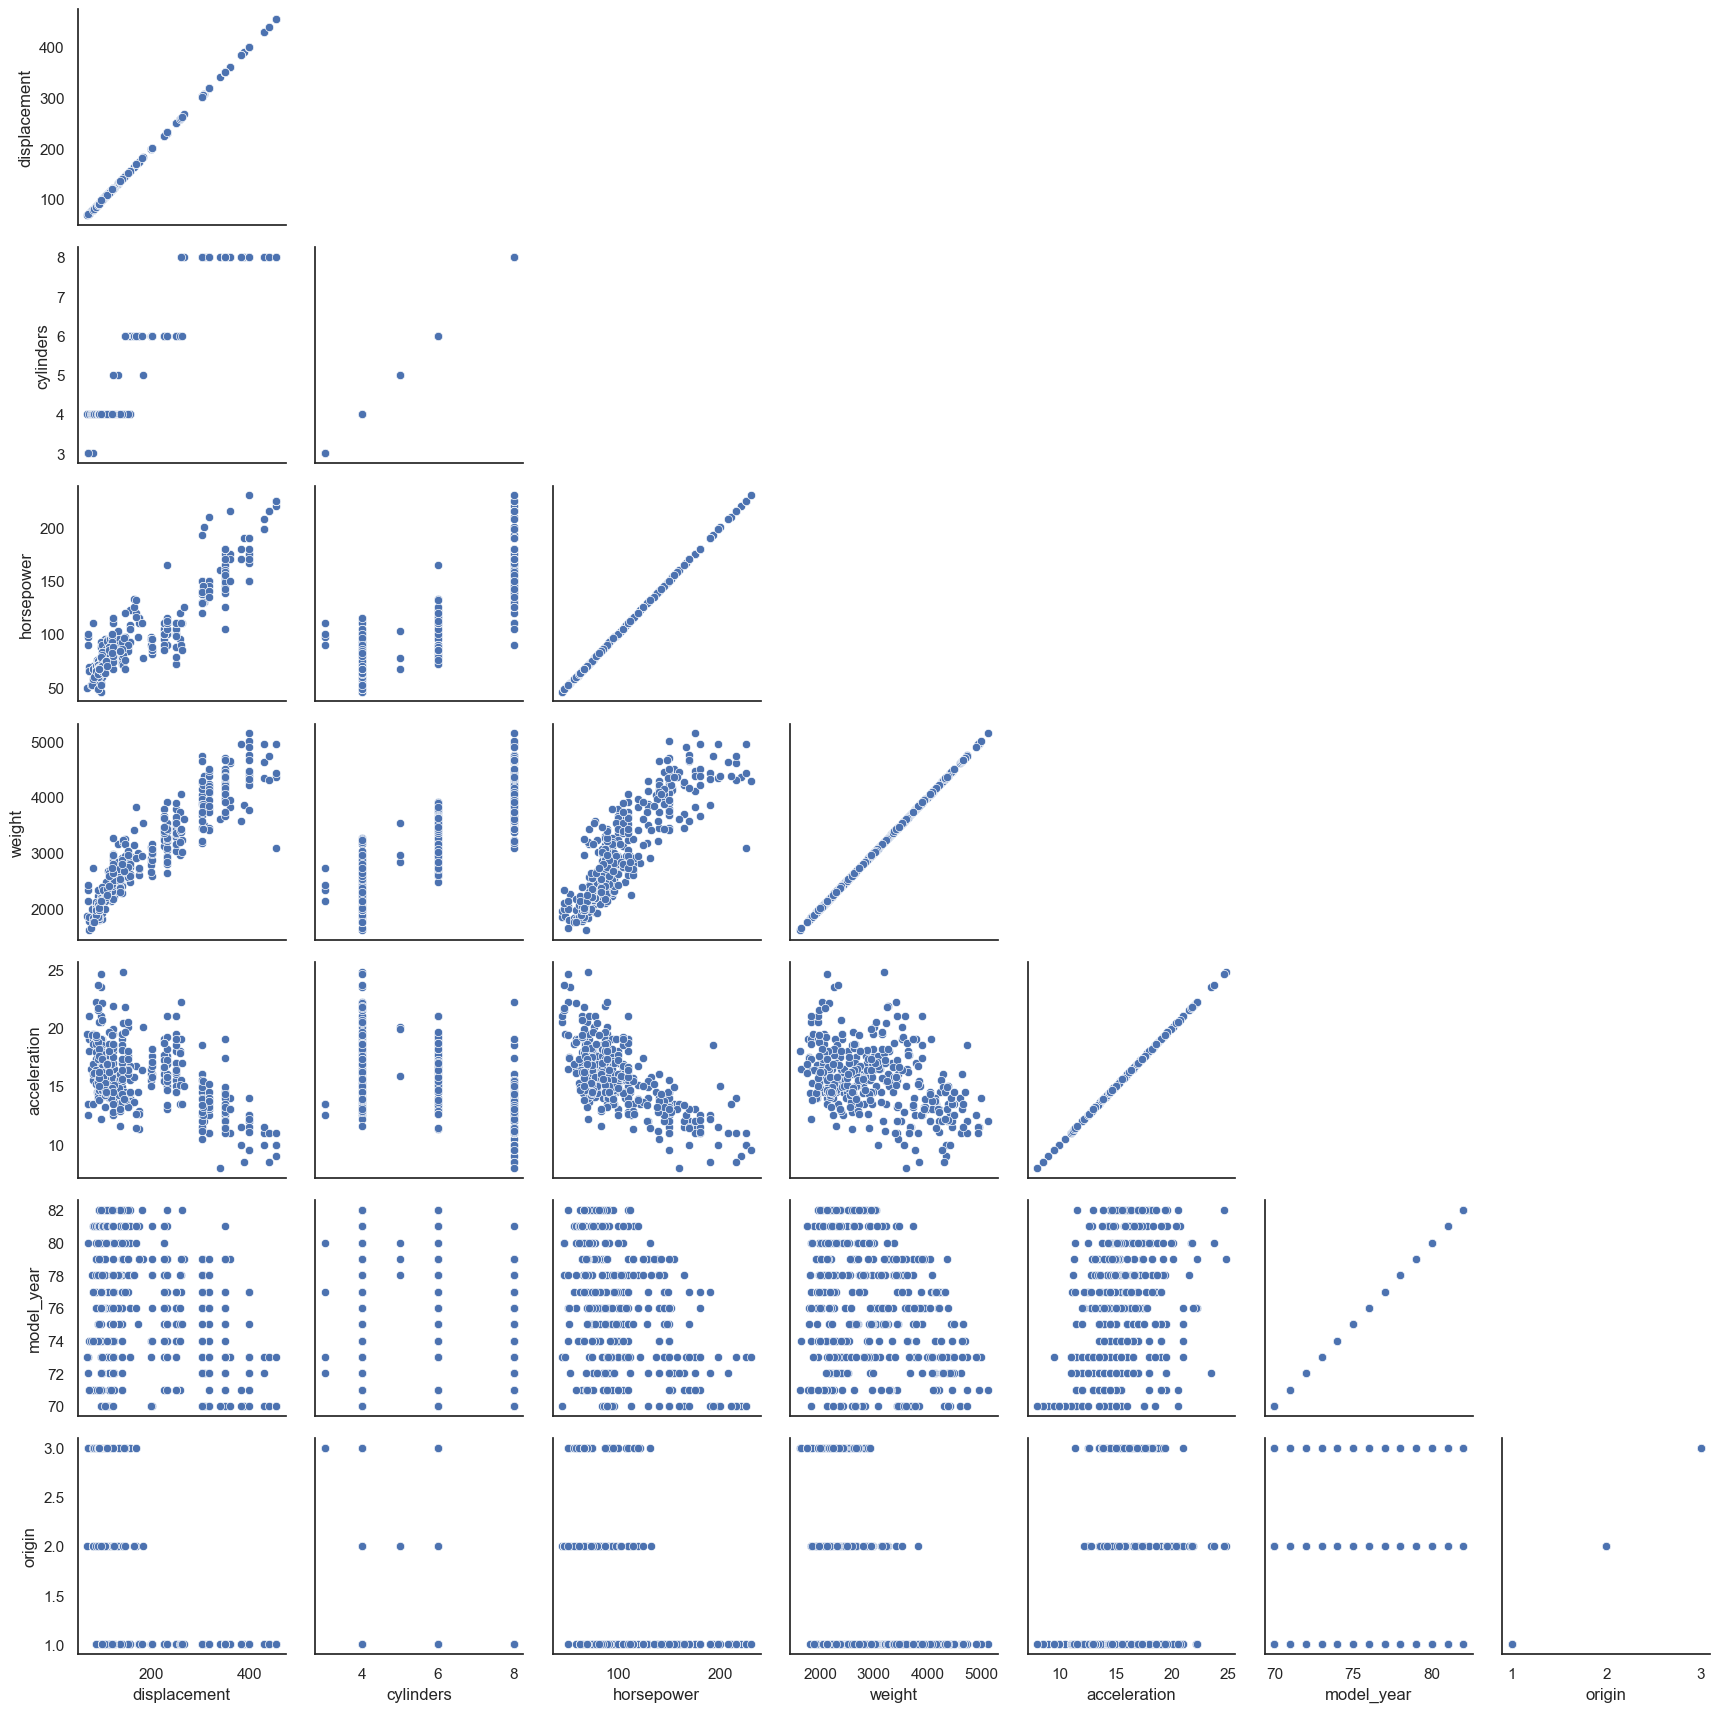

In [39]:
grid = sns.PairGrid(data, corner=True)
grid.map(sns.scatterplot)

plt.show()

Calculating the correlation for the car_name makes no sense.

# Income vs. Expenditures

Given below are the incomes and weekly consumption expenditures of four households (sample), each measured in euros:

Work on the following task:

- Calculate the covariance between income and expenditure. Interpret the result.
- Calculate the covariance when income is measured in Euro cents. How does this affect the interpretation?
- Switch back to income in Euro. Calculate the Pearson correlation coefficient. Interpret the results.
- Calculate the correlation coefficient when income is measured in Euro Cents. How does this affect the interpretation?


In [40]:
income = [150, 250, 175, 165]
expenditure = [135, 150, 140, 150]
df = pd.DataFrame({'income': income, 'expenditure': expenditure})
df['expenditure_cent'] = df['expenditure']*100
df.head()

,income,expenditure,expenditure_cent
0,150,135,13500
1,250,150,15000
2,175,140,14000
3,165,150,15000


### Covariance

In [41]:
# Calculate the covariance
covariance = df['income'].cov(df['expenditure']).round(3)
print(f"Covariance = {covariance}")

Covariance = 208.333


In [42]:
# Calculate the covariance
covariance = df['income'].cov(df['expenditure_cent']).round(3)
print(f"Covariance = {covariance}")

Covariance = 20833.333


The covariance changes by the factor 100 (same as Euros to cents)

### Pearson correlation

In [43]:
# Calculate the pearson correlation
pearson_corr = df['income'].corr(df['expenditure']).round(3)
print(f"Pearson correlation = {pearson_corr}")

# Calculate the pearson correlation
pearson_corr = df['income'].corr(df['expenditure_cent']).round(3)
print(f"Pearson correlation = {pearson_corr}")

Pearson correlation = 0.624
Pearson correlation = 0.624


It has no affect if the value is in euro or cents.